In [1]:
# Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
api_key = "51ed96e7"

url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="

movies = ["Aliens", "Sing", "Moana","oihihi","John Wick: chapter 2","Monster's Ball","Forrest Gump","Top Gun","The Matrix","Avatar","American Beauty","The Terminal","Bird Cage","Jurassic World","Black Panther: Wakanda Forever","The Secret Life of Pets","Transformers: Dark of the Moon","Frozen","Toy Story 4","The Hunger Games","A THOUSAND WORDS","GOTTI","THE LAST DAYS OF AMERICAN CRIME","THE DISAPPOINTMENTS ROOM","MAX STEEL"]

responses = []
meta_score = []
imdb_score = []
boxoffice = []
genre = []
rotten = []


# Make a request to the OMDb API for each movie in the list.
for movie in movies:
    movie_data = requests.get(url + movie).json()
   
    try:
        mscore = float(movie_data["Metascore"])
        iscore = float(movie_data["imdbRating"])
        boffice = float((movie_data["BoxOffice"].replace('$', '')).replace(',', ''))
        mtype = movie_data["Genre"]
        rot = float(movie_data["Ratings"][1]["Value"].replace('%',''))
        print(f"{movie} is a movie with a IMDB score of {iscore}, a Meta score of {mscore}, Rotten Tomatoes score of {rot} and made {boffice} at the box office")
        print("---------------------")
        meta_score.append(mscore)
        imdb_score.append(iscore)
        boxoffice.append(boffice)
        rotten.append(rot)
        genre.append(mtype)
    except:
        print(f"{movie} not found")
        print("---------------------")
        pass
   


Aliens is a movie with a IMDB sorec of 8.4, a Meta score of 84.0, Rotten Tomatoes score of 98.0 and made 85160248.0 at the box office
---------------------
Sing is a movie with a IMDB sorec of 7.1, a Meta score of 59.0, Rotten Tomatoes score of 71.0 and made 270578425.0 at the box office
---------------------
Moana is a movie with a IMDB sorec of 7.6, a Meta score of 81.0, Rotten Tomatoes score of 95.0 and made 248757044.0 at the box office
---------------------
oihihi not found
---------------------
John Wick: chapter 2 is a movie with a IMDB sorec of 7.4, a Meta score of 75.0, Rotten Tomatoes score of 89.0 and made 92029184.0 at the box office
---------------------
Monster's Ball is a movie with a IMDB sorec of 7.1, a Meta score of 69.0, Rotten Tomatoes score of 85.0 and made 31273922.0 at the box office
---------------------
Forrest Gump is a movie with a IMDB sorec of 8.8, a Meta score of 82.0, Rotten Tomatoes score of 71.0 and made 330455270.0 at the box office
-------------------

The correlation strength between IMDB score and boxoffice earnings is 0.36
The equation of the line is y = 60273179.8x + -169820471.76


Text(0, 0.5, 'Boxoffice Earnings ($100Ms)')

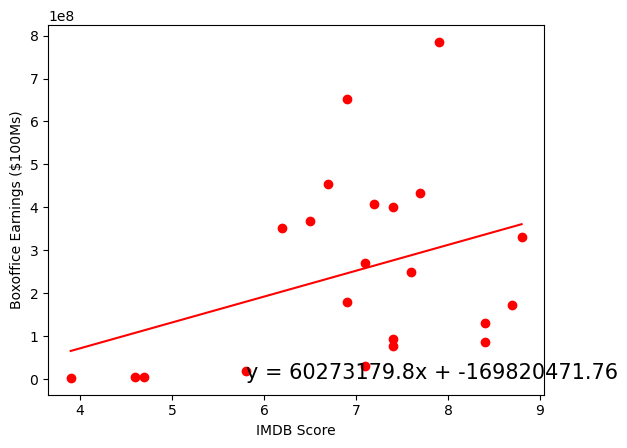

In [3]:
#Meta Score vs Block Office Success
#Create dataframe with sorted Meta scores
per_IMDB_score = pd.DataFrame({"IMDB Score":imdb_score,"Box Office Earnings":boxoffice})
sorted_IMBD_score = per_IMDB_score.sort_values("IMDB Score", ascending = True)


#Plot IMDB scores vs earnings
plt.scatter(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1],marker = "o", color = "red")

#Determine strenght of relationship between IMDB score and boxoffice earnings
IMDB_correlation = st.pearsonr(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1])
print(f"The correlation strength between IMDB score and boxoffice earnings is {round(IMDB_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope, intercept, rvalue, pvalue, stderr) = linregress(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1])
regress_values = (sorted_IMBD_score.iloc[:,0])* slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation of the line is {line_eq}")
plt.plot(sorted_IMBD_score.iloc[:,0],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize = 15, color = "black")
plt.xlabel('IMDB Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')

In [4]:
sorted_IMBD_score

,IMDB Score,Box Office Earnings
20,3.9,2423468.0
21,4.6,3818664.0
19,4.7,4343227.0
18,5.8,18450127.0
14,6.2,352390543.0
13,6.5,368384330.0
12,6.7,453829060.0
6,6.9,180258178.0
11,6.9,653406625.0
1,7.1,270578425.0


The correlation strength between meta score and boxoffice earnings is 0.46
The equation of the line is y = 4807079.99x + -45679919.38


Text(0, 0.5, 'Boxoffice Earnings ($100Ms)')

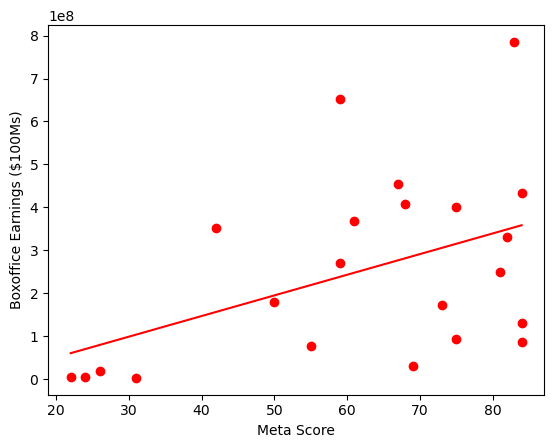

In [10]:
#Meta Score vs Block Office Success
#Create dataframe with sorted Meta scores
per_meta = pd.DataFrame({"Meta Score":meta_score,"Box Office Earnings":boxoffice})
sorted_meta_score = per_meta.sort_values("Meta Score", ascending = True)

#Plot meta scores vs earnings
plt.scatter(sorted_meta_score.iloc[:,0],sorted_meta_score.iloc[:,1],marker = "o", color = "red")

#Determine strenght of relationship between meta score and boxoffice earnings
meta_correlation = st.pearsonr(sorted_meta_score.iloc[:,0],sorted_meta_score.iloc[:,1])
print(f"The correlation strength between meta score and boxoffice earnings is {round(meta_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(sorted_meta_score.iloc[:,0],sorted_meta_score.iloc[:,1])
regress_values2 = (sorted_meta_score.iloc[:,0])* slope2  + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
print(f"The equation of the line is {line_eq2}")

plt.plot(sorted_meta_score.iloc[:,0],regress_values2,"r-")
plt.annotate(line_eq2,(5.8,0.8),fontsize = 15, color = "black")
plt.xlabel('Meta Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')
